# Happiness World Report

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('happiness_score_dataset.csv')
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
ds.shape

(158, 12)

In [4]:
ds.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
ds.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
ds.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

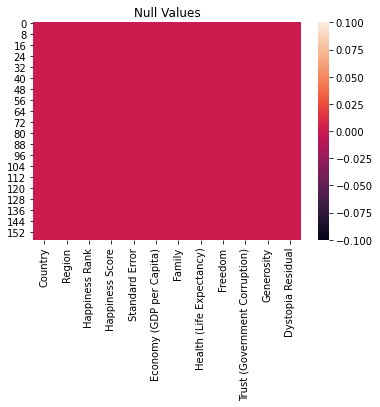

In [8]:
sns.heatmap(ds.isnull())
plt.title('Null Values')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
list1=['Country','Region']
for k in list1:
    ds[k]=le.fit_transform(ds[k])
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ds=sc.fit_transform(ds)
ds

array([[ 1.23877001,  1.30025593, -1.72099989, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-0.44946522,  1.30025593, -1.69907456, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.90989302,  1.30025593, -1.67714922, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.26069514, -0.37544095,  1.67742676, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-1.26069514,  0.96511655,  1.69935209, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.37032081,  0.96511655,  1.72127743, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [12]:
dsf=pd.DataFrame(ds)
dsf

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.238770,1.300256,-1.721000,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-0.449465,1.300256,-1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.909893,1.300256,-1.677149,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,-1.655224,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.194920,-0.040302,-1.633299,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-1.674055,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.436096,0.965117,1.655501,-1.783571,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.260695,-0.375441,1.677427,-2.076199,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-1.260695,0.965117,1.699352,-2.164688,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [13]:
dsf.rename({0:'Country',1:'Region',2:'HappinessRank',3:'HappinessScore',4:'StandardError',5:'Economy(GDP per Capita)',
           6:'Family',7:'Health(Life Expectancy)',8:'Freedom',9:'Trust(Government Corruption)',10:'Generosity',
           11:'DistopiaResidual'},axis=1)

,Country,Region,HappinessRank,HappinessScore,StandardError,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,DistopiaResidual
0,1.238770,1.300256,-1.721000,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-0.449465,1.300256,-1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.909893,1.300256,-1.677149,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,-1.655224,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.194920,-0.040302,-1.633299,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-1.674055,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.436096,0.965117,1.655501,-1.783571,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.260695,-0.375441,1.677427,-2.076199,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-1.260695,0.965117,1.699352,-2.164688,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [14]:
dsf.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object

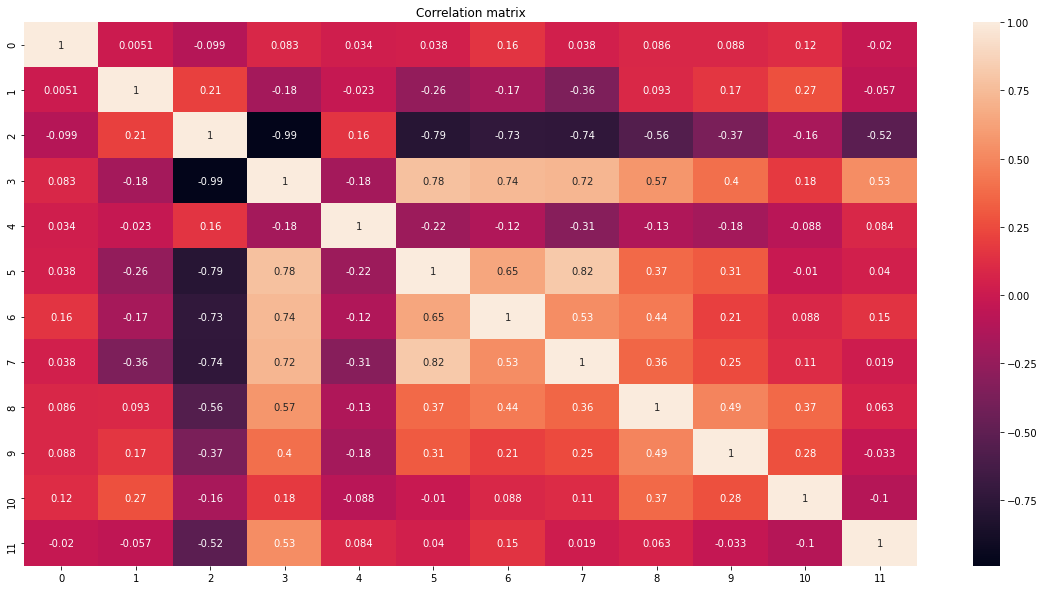

In [15]:
corr=dsf.corr()                                               # multivariate analysis
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

In [16]:
corr_matrix=dsf.corr()
corr_matrix[11].sort_values(ascending=False)

11    1.000000
3     0.530474
6     0.148117
4     0.083981
8     0.062783
5     0.040059
7     0.018979
0    -0.019778
9    -0.033105
1    -0.057276
10   -0.101301
2    -0.521999
Name: 11, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


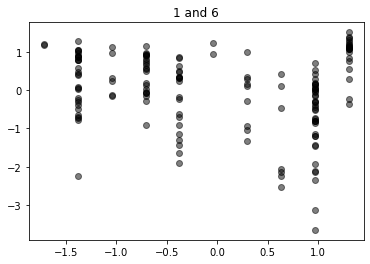

In [17]:
plt.scatter(dsf[1],dsf[6],alpha=0.5,c=(0,0,0))                                        # Bivariate analysis
plt.title("1 and 6")
plt.show()

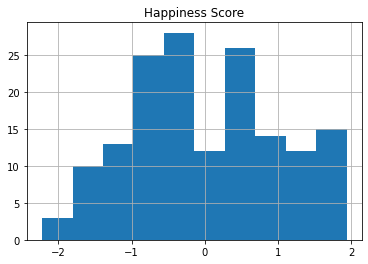

In [18]:
dsf[3].hist(grid=True)                # Univariate analysis
plt.title('Happiness Score')
plt.show()

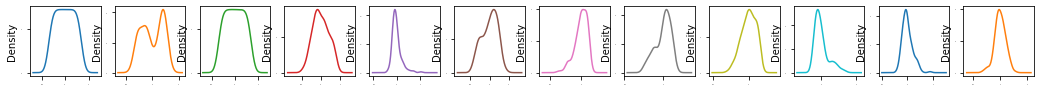

In [19]:
dsf.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

In [20]:
x=dsf.drop(3,axis=1)
y=dsf[3]

In [21]:
x.skew()

0     0.000000
1    -0.116119
2     0.000418
4     1.983439
5    -0.317575
6    -1.006893
7    -0.705328
8    -0.413462
9     1.385463
10    1.001961
11   -0.238911
dtype: float64

In [22]:
from sklearn.preprocessing import power_transform
df=power_transform(x)
df=pd.DataFrame(df,columns=x.columns)

In [23]:
df.skew()

0     1.122296e-08
1    -5.533039e-02
2     3.170854e-06
4    -1.248056e-01
5    -1.852075e-02
6    -9.175613e-02
7    -6.332654e-02
8    -5.751953e-02
9     1.331450e-01
10    1.189203e-03
11   -3.164626e-02
dtype: float64

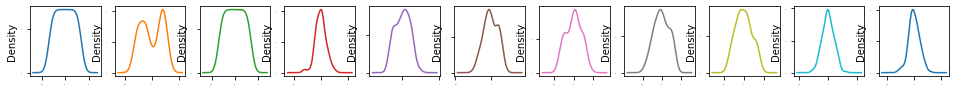

In [24]:
df.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

In [25]:
df=x

In [26]:
x.rename({0:'Country',1:'Region',2:'HappinessRank',4:'StandardError',5:'Economy(GDP per Capita)',
           6:'Family',7:'Health(Life Expectancy)',8:'Freedom',9:'Trust(Government Corruption)',10:'Generosity',
           11:'DistopiaResidual'},axis=1)

,Country,Region,HappinessRank,StandardError,Economy(GDP per Capita),Family,Health(Life Expectancy),Freedom,Trust(Government Corruption),Generosity,DistopiaResidual
0,1.238770,1.300256,-1.721000,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-0.449465,1.300256,-1.699075,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.909893,1.300256,-1.677149,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,-1.655224,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.194920,-0.040302,-1.633299,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,-1.436096,0.965117,1.655501,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.260695,-0.375441,1.677427,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,-1.260695,0.965117,1.699352,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


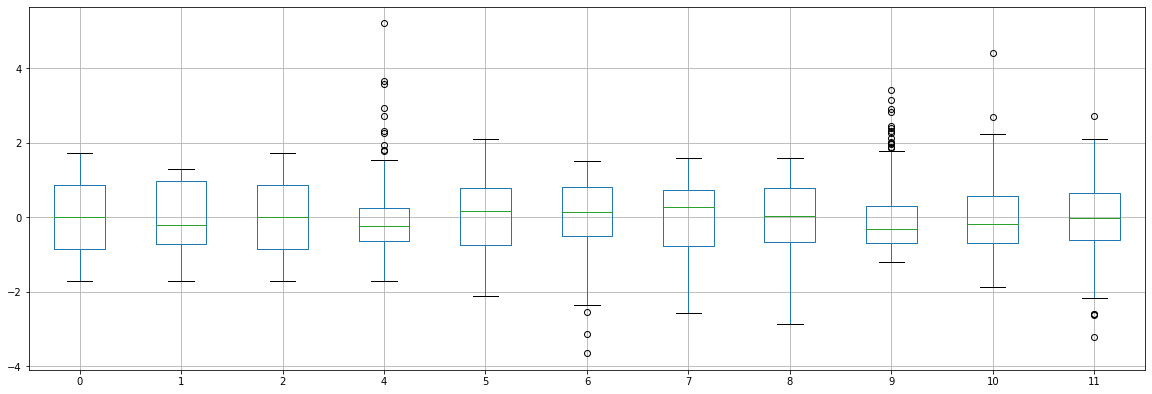

In [27]:
x.iloc[:,0:12].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [28]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [29]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


In [30]:
z[40][3]

3.5727739331415806

In [31]:
z[153][8]

3.4139224398643333

In [32]:
x1=x[(z<3).all(axis=1)]                    # removing outliers
x1

,0,1,2,4,5,6,7,8,9,10,11
0,1.238770,1.300256,-1.721000,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-0.449465,1.300256,-1.699075,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-0.909893,1.300256,-1.677149,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,-1.655224,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.194920,-0.040302,-1.633299,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
150,-0.274064,0.965117,1.567800,0.206254,-0.947627,-0.809913,-1.942427,0.266585,0.299182,-0.282266,-1.235507
151,-1.282620,0.965117,1.589725,-0.271752,-1.463301,-0.512571,-1.457642,-0.224245,-0.126213,-0.156992,-1.149044
152,-1.721123,0.629977,1.611651,-0.997245,-1.309758,-2.534738,-1.327310,-1.294643,-0.386381,1.012045,-0.266180
154,-1.436096,0.965117,1.655501,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967


In [33]:
x1=x

In [34]:
from sklearn.metrics import r2_score

In [35]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.9999999385546144 on Random_state  1
Best Accuracy is  0.9999999385546144 on Random_state  1
Best Accuracy is  0.9999999423295205 on Random_state  3
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_state  4
Best Accuracy is  0.9999999476142678 on Random_s

Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy is  0.9999999635496819 on Random_state  148
Best Accuracy 

In [36]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=148)

In [37]:
ln=LinearRegression()
ln.fit(x_train,y_train)


LinearRegression()

In [38]:
ln.coef_

array([-4.01025612e-05, -1.74072577e-05, -3.71415245e-04, -1.44697877e-05,
        3.51983085e-01,  2.37802611e-01,  2.15652920e-01,  1.31493489e-01,
        1.04813105e-01,  1.10611030e-01,  4.83267975e-01])

In [39]:
ln.intercept_

1.9442903170605735e-06

In [40]:
ln.score(x_train,y_train)

0.9999999282684632

In [41]:
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)

predicted price [-1.03511205 -0.75161234  1.25670415 -0.31775572 -0.76105264 -0.96829481
  1.88479236  1.23570918  1.24585553 -0.41893252 -1.13818472  1.20415075
 -1.29598963 -1.49681619  1.62075165  0.40040881  0.53570243 -0.45399106
  0.4403539  -0.71064313  1.67365889  1.36819133  0.29177908  1.13370054
  0.80814827 -2.22249015 -1.48491458 -0.2790335  -1.78348437 -1.4876551
 -1.21513655  0.39649149 -1.26602247 -0.445619    1.59810785 -0.93641342
  1.58706853 -2.07578756  1.66630703 -0.43785086  0.78275576  0.08871094
 -0.35448807  1.88044663 -1.34118548  0.90721604  0.65454822 -0.91432497]
actual price 134   -1.035355
118   -0.751488
22     1.256606
91    -0.317803
122   -0.761126
131   -0.967893
2      1.884792
24     1.235579
23     1.246092
96    -0.418558
135   -1.137862
25     1.204038
142   -1.296442
148   -1.497076
11     1.621077
55     0.400625
45     0.535549
101   -0.454479
52     0.440051
116   -0.710310
8      1.673644
18     1.367874
64     0.291985
26     1.133947
37 

In [42]:
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))

Error :-
mean absolute error :- 0.00018771232968969268
mean squared error :- 5.043202207746134e-08
root mean squared error :- 0.00022457075071669806


In [43]:
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

r2_score value :- 0.9999999635496819


In [44]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ln,x,y,cv=5)
print("cross validation score linear regression model",scr.mean())

cross validation score linear regression model 0.9999982417917263


In [45]:
import joblib
joblib.dump(ln,'happinesslinearmodel')

['happinesslinearmodel']